Our target variable is ksat which stands for Saturated Hydraulic Conductivity

**Data Loading and Understanding**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
data= pd.read_excel('data.xlsx')

In [89]:
data.head()

,Source reference,Soil name,Site label,Depth (cm),Field/lab,Sample Height (cm),Sample diameter (cm),Method,Ksat,Units,...,Stdev_Sand (%),Stdev_Silt (%),Stdev_Clay (%),Stdev_Coarse_fragments (%),Textural class.1,Stdev_Organic carbon,Other potentally relevant info,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1,Groseclose,I/1,0,Lab,4,5.4,Falling head,0.000008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Groseclose,I/1,50,Lab,4,5.4,Falling head,0.000004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Groseclose,I/2,0,Lab,4,5.4,Falling head,0.000004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Groseclose,I/2,50,Lab,4,5.4,Falling head,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Groseclose,I/3,0,Lab,4,5.4,Falling head,0.000001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there are many missing values. Also there are unnamed columns which are emplty. We can handle them later.

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27483 entries, 0 to 27482
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Source reference                27450 non-null  object
 1   Soil name                       2435 non-null   object
 2   Site label                      27375 non-null  object
 3   Depth (cm)                      27449 non-null  object
 4   Field/lab                       27084 non-null  object
 5   Sample Height (cm)              27444 non-null  object
 6   Sample diameter (cm)            27440 non-null  object
 7   Method                          27448 non-null  object
 8   Ksat                            27449 non-null  object
 9   Units                           20530 non-null  object
 10  Bulk density                    27097 non-null  object
 11  Very coarse                     27052 non-null  object
 12  Coarse                          20773 non-null

We can see that many features here have wrong data type. For eg, sample height, sample diameter etc.We will handle them in data cleaning steps.

In [91]:
data.describe()

,Source reference,Soil name,Site label,Depth (cm),Field/lab,Sample Height (cm),Sample diameter (cm),Method,Ksat,Units,...,Stdev_Sand (%),Stdev_Silt (%),Stdev_Clay (%),Stdev_Coarse_fragments (%),Textural class.1,Stdev_Organic carbon,Other potentally relevant info,Unnamed: 32,Unnamed: 33,Unnamed: 34
count,27450,2435,27375,27449,27084,27444,27440.0,27448,27449,20530.00,...,63,127,182,47,41,41,33,33,32,156
unique,40,327,347,3516,681,8,23.0,21,165,2737.00,...,4,30,87,13,11,11,3,3,2,19
top,35,Groseclose,Alachua,0cm..15cm,A,lab,5.4,3,Constant Head,0.01,...,Units,Stdev_Bulk density,Stdev_Ksat,Stdev_Sand (%),Stdev_Silt (%),Stdev_Clay (%),Stdev_Coarse_fragments (%),Textural class,Stdev_Organic carbon,"Ksat = geomean, Ksat Stvd = stdv Ksat log 10, ..."
freq,24816,152,1023,723,1954,26592,26067.0,25991,26303,230.00,...,32,32,30,30,30,30,30,30,30,41


**Remove unnecessary spaces from column names**

In [92]:
# Strip leading/trailing and inner multiple spaces
data.columns = data.columns.str.strip().str.replace(r'\s+', ' ', regex=True)


In [93]:
# Replace symbols and clean up for consistency
data.columns = data.columns.str.replace(' (%)', '_percent', regex=False)
data.columns = data.columns.str.replace(' ', '_')  # Replace space with underscore
data.columns = data.columns.str.replace('(', '').str.replace(')', '')
data.columns = data.columns.str.replace('.', '', regex=False)


In [94]:
print(data.columns.tolist())


['Source_reference', 'Soil_name', 'Site_label', 'Depth_cm', 'Field/lab', 'Sample_Height_cm', 'Sample_diameter_cm', 'Method', 'Ksat', 'Units', 'Bulk_density', 'Very_coarse', 'Coarse', 'Medium', 'Fine', 'Very_fine', 'Sand_percent', 'Silt_percent', 'Clay_percent', 'Coarse_fragments_percent', 'Textural_class', 'Organic_carbon', 'Organic_matter', 'Units1', 'Stdev_Bulk_density', 'Stdev_Sand_percent', 'Stdev_Silt_percent', 'Stdev_Clay_percent', 'Stdev_Coarse_fragments_percent', 'Textural_class1', 'Stdev_Organic_carbon', 'Other_potentally_relevant_info', 'Unnamed:_32', 'Unnamed:_33', 'Unnamed:_34']


In [95]:
missing_percent = data.isnull().mean() * 100
missing_summary = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Display the result
print(missing_summary)


Unnamed:_33                       99.883564
Unnamed:_32                       99.879926
Other_potentally_relevant_info    99.879926
Stdev_Organic_carbon              99.850817
Textural_class1                   99.850817
Stdev_Coarse_fragments_percent    99.828985
Stdev_Bulk_density                99.799876
Stdev_Sand_percent                99.770767
Organic_carbon                    99.756213
Stdev_Silt_percent                99.537896
Unnamed:_34                       99.432376
Stdev_Clay_percent                99.337772
Soil_name                         91.139977
Units                             25.299276
Coarse                            24.415093
Medium                            11.465269
Units1                            11.265146
Fine                              11.196012
Very_fine                         11.196012
Sand_percent                      11.196012
Silt_percent                      11.043190
Organic_matter                     9.172943
Textural_class                  

There are many missing values

**Removing the unnamed columns**

In [96]:
# Remove columns that start with 'Unnamed'
data = data.loc[:, ~data.columns.str.startswith('Unnamed')]


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27483 entries, 0 to 27482
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Source_reference                27450 non-null  object
 1   Soil_name                       2435 non-null   object
 2   Site_label                      27375 non-null  object
 3   Depth_cm                        27449 non-null  object
 4   Field/lab                       27084 non-null  object
 5   Sample_Height_cm                27444 non-null  object
 6   Sample_diameter_cm              27440 non-null  object
 7   Method                          27448 non-null  object
 8   Ksat                            27449 non-null  object
 9   Units                           20530 non-null  object
 10  Bulk_density                    27097 non-null  object
 11  Very_coarse                     27052 non-null  object
 12  Coarse                          20773 non-null

So here we ahve dropped the unnamed columns and check again and boom! it got removed💁🏼

I checked the columns in the dataset which are empty in the and now will check in what percentage are they misisng.

In [98]:
# List the suspect columns
suspect_cols = [
    'Coarse_fragments_percent', 'Textural_class', 'Organic_carbon',
    'Organic_matter', 'Units', 'Stdev_Bulk_density', 'Stdev_Sand_percent',
    'Stdev_Silt_percent', 'Stdev_Clay_percent', 'Stdev_Coarse_fragments_percent',
    'Textural_class1', 'Stdev_Organic_carbon', 'Other_potentally_relevant_info'
]

# Check % missing in these
data[suspect_cols].isnull().mean() * 100


Coarse_fragments_percent           8.554379
Textural_class                     8.714478
Organic_carbon                    99.756213
Organic_matter                     9.172943
Units                             25.299276
Stdev_Bulk_density                99.799876
Stdev_Sand_percent                99.770767
Stdev_Silt_percent                99.537896
Stdev_Clay_percent                99.337772
Stdev_Coarse_fragments_percent    99.828985
Textural_class1                   99.850817
Stdev_Organic_carbon              99.850817
Other_potentally_relevant_info    99.879926
dtype: float64

Most of these columns are >99% missing and will bring noise, not value and keeping.👀

In [99]:
drop_cols = [
    'Organic_carbon', 'Stdev_Bulk_density', 'Stdev_Sand_percent', 'Stdev_Silt_percent',
    'Stdev_Clay_percent', 'Stdev_Coarse_fragments_percent', 'Textural_class1',
    'Stdev_Organic_carbon', 'Other_potentally_relevant_info'
]

data.drop(columns=drop_cols, inplace=True)


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27483 entries, 0 to 27482
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Source_reference          27450 non-null  object
 1   Soil_name                 2435 non-null   object
 2   Site_label                27375 non-null  object
 3   Depth_cm                  27449 non-null  object
 4   Field/lab                 27084 non-null  object
 5   Sample_Height_cm          27444 non-null  object
 6   Sample_diameter_cm        27440 non-null  object
 7   Method                    27448 non-null  object
 8   Ksat                      27449 non-null  object
 9   Units                     20530 non-null  object
 10  Bulk_density              27097 non-null  object
 11  Very_coarse               27052 non-null  object
 12  Coarse                    20773 non-null  object
 13  Medium                    24332 non-null  object
 14  Fine                  

In [101]:
numeric_columns = [
    'Depth_cm', 'Sample_Height_cm', 'Sample_diameter_cm',
    'Ksat', 'Bulk_density', 'Very_coarse', 'Coarse', 'Medium',
    'Fine', 'Very_fine', 'Sand_percent', 'Silt_percent',
    'Clay_percent', 'Coarse_fragments_percent', 'Organic_matter'
]


In [102]:
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27483 entries, 0 to 27482
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Source_reference          27450 non-null  object 
 1   Soil_name                 2435 non-null   object 
 2   Site_label                27375 non-null  object 
 3   Depth_cm                  497 non-null    float64
 4   Field/lab                 27084 non-null  object 
 5   Sample_Height_cm          152 non-null    float64
 6   Sample_diameter_cm        27407 non-null  float64
 7   Method                    27448 non-null  object 
 8   Ksat                      151 non-null    float64
 9   Units                     20530 non-null  object 
 10  Bulk_density              75 non-null     float64
 11  Very_coarse               27019 non-null  float64
 12  Coarse                    20669 non-null  float64
 13  Medium                    24297 non-null  float64
 14  Fine  

Now extra columns are removed lets work on these features now.Lets again check for missing values and move on😌

In [104]:
# Calculate the percentage of missing values in each column
missing_percent = data.isnull().mean() * 100

# Filter columns with more than 0% missing values and sort them in descending order
missing_summary = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Display the summary of missing values
missing_summary


Bulk_density                99.727104
Organic_matter              99.537896
Ksat                        99.450569
Sample_Height_cm            99.446931
Depth_cm                    98.191609
Soil_name                   91.139977
Units                       25.299276
Coarse                      24.793509
Medium                      11.592621
Fine                        11.319725
Very_fine                   11.316086
Sand_percent                11.316086
Units1                      11.265146
Silt_percent                11.166903
Coarse_fragments_percent     8.725394
Textural_class               8.714478
Clay_percent                 8.470691
Very_coarse                  1.688316
Field/lab                    1.451807
Site_label                   0.392970
Sample_diameter_cm           0.276535
Method                       0.127351
Source_reference             0.120074
dtype: float64

In [105]:
print("Shape of data:", data.shape)


Shape of data: (27483, 23)


In [106]:
# Fill missing numerical values with median
for col in numeric_columns:
    if data[col].isnull().any():
        median_val = data[col].median()  # Get the median
        data[col].fillna(median_val, inplace=True)

# Fill missing categorical values with mode
categorical_cols = ['Textural_class', 'Units']  # Add other categorical columns
for col in categorical_cols:
    if data[col].isnull().any():
        mode_val = data[col].mode()[0]  # Get the mode
        data[col].fillna(mode_val, inplace=True)


In [107]:
data[numeric_columns].isnull().sum()

Depth_cm                    0
Sample_Height_cm            0
Sample_diameter_cm          0
Ksat                        0
Bulk_density                0
Very_coarse                 0
Coarse                      0
Medium                      0
Fine                        0
Very_fine                   0
Sand_percent                0
Silt_percent                0
Clay_percent                0
Coarse_fragments_percent    0
Organic_matter              0
dtype: int64

In [108]:
data[categorical_cols].isnull().sum()

Textural_class    0
Units             0
dtype: int64

In [109]:
print("Shape of data:", data.shape)
print("\nDetailed statistics:")
data.describe()

Shape of data: (27483, 23)

Detailed statistics:


,Depth_cm,Sample_Height_cm,Sample_diameter_cm,Ksat,Bulk_density,Very_coarse,Coarse,Medium,Fine,Very_fine,Sand_percent,Silt_percent,Clay_percent,Coarse_fragments_percent,Organic_matter
count,27483.000000,27483.000000,27483.000000,2.748300e+04,27483.000000,27483.000000,27483.000000,27483.000000,27483.000000,27483.000000,27483.000000,27483.000000,27483.000000,27483.000000,27483.000000
mean,50.351381,5.005531,5.685920,9.742220e-06,1.410009,0.762779,1.521619,0.413529,3.912468,20.478642,48.294189,10.015154,83.231829,6.841002,0.404529
std,8.129272,0.196687,3.574158,4.857517e-06,0.007186,0.490705,0.365836,1.311926,4.875534,15.819190,20.169785,8.661838,26.435620,10.015666,0.129403
min,0.000000,4.000000,0.000000,7.430000e-09,0.950000,0.000000,-0.234150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.745905,0.000000
25%,50.000000,5.000000,5.400000,9.580000e-06,1.410000,1.000000,1.480000,0.000000,0.900000,8.800000,34.200000,4.100000,77.400000,2.200000,0.400000
50%,50.000000,5.000000,5.400000,9.580000e-06,1.410000,1.000000,1.540000,0.100000,2.300000,16.900000,47.500000,7.800000,91.100000,4.100000,0.400000
75%,50.000000,5.000000,5.400000,9.580000e-06,1.410000,1.000000,1.600000,0.200000,5.000000,28.200000,62.200000,13.300000,95.600000,7.000000,0.400000
max,420.000000,10.000000,76.200000,3.340000e-04,1.710000,12.800000,35.200000,29.700000,108.000000,77.700000,98.100000,90.100000,3050.000000,94.500000,5.700000


Correlations with Ksat:
Ksat                        1.000000
Sample_Height_cm            0.593978
Sample_diameter_cm          0.068433
Bulk_density                0.042101
Very_coarse                 0.027996
Clay_percent                0.005642
Silt_percent                0.002613
Coarse                     -0.004269
Sand_percent               -0.004940
Medium                     -0.006752
Coarse_fragments_percent   -0.009140
Very_fine                  -0.009304
Fine                       -0.010997
Organic_matter             -0.012040
Depth_cm                   -0.136460
Name: Ksat, dtype: float64


Random Forest Feature Importance:
                     feature    importance
1           Sample_Height_cm  7.324491e-01
0                   Depth_cm  1.272341e-01
3               Bulk_density  3.769470e-02
2         Sample_diameter_cm  3.523943e-02
4                Very_coarse  1.373276e-02
8                  Very_fine  1.077190e-02
10              Silt_percent  9.216246e-03
11            

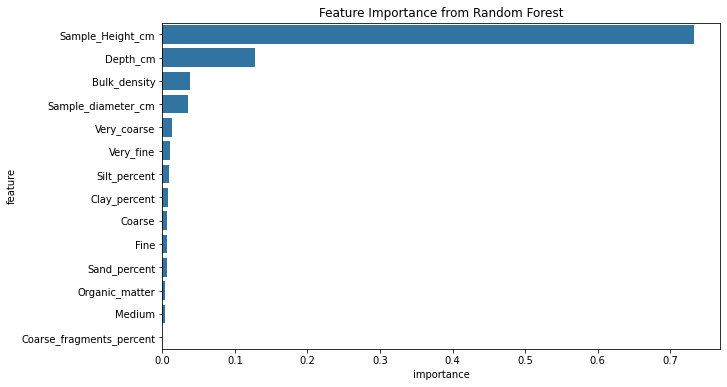

Selected features based on importance threshold:
['Sample_Height_cm', 'Depth_cm', 'Ksat']
           Depth_cm  Sample_Height_cm  Sample_diameter_cm          Ksat  \
count  27483.000000      27483.000000        27483.000000  2.748300e+04   
mean      50.351381          5.005531            5.685920  9.742220e-06   
std        8.129272          0.196687            3.574158  4.857517e-06   
min        0.000000          4.000000            0.000000  7.430000e-09   
25%       50.000000          5.000000            5.400000  9.580000e-06   
50%       50.000000          5.000000            5.400000  9.580000e-06   
75%       50.000000          5.000000            5.400000  9.580000e-06   
max      420.000000         10.000000           76.200000  3.340000e-04   

       Bulk_density   Very_coarse        Coarse        Medium          Fine  \
count  27483.000000  27483.000000  27483.000000  27483.000000  27483.000000   
mean       1.410009      0.762779      1.521619      0.413529      3.912468 

In [110]:
# Feature selection using different techniques

# 1. Correlation with target variable (Ksat)
correlations = data[numeric_columns].corr()['Ksat'].sort_values(ascending=False)
print("Correlations with Ksat:")
print(correlations)
print("\n")

# 2. Feature importance using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Prepare data for Random Forest
X = data[numeric_columns].drop('Ksat', axis=1)
y = data['Ksat']

# Initialize and fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Random Forest Feature Importance:")
print(feature_importance)
print("\n")

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.show()

# Select top features based on importance threshold
importance_threshold = 0.05  # Adjust this threshold as needed
selected_features = feature_importance[feature_importance['importance'] > importance_threshold]['feature'].tolist()
selected_features.append('Ksat')  # Add target variable back

print("Selected features based on importance threshold:")
print(selected_features)

# Create dataset with selected features
data_selected = data[selected_features]

# Summary statistics for numerical features
print(data.describe())



In [111]:
# Import required libraries
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.impute import SimpleImputer

try:
    # Define features and target variables
    features = data[numeric_columns].drop('Ksat', axis=1)
    target = data['Ksat']

    # Drop columns with too many missing values or non-numeric types
    valid_numeric_cols = features.columns[features.notna().sum() > 0]
    features_clean = features[valid_numeric_cols]

    # Re-impute missing values
    features_imputed = pd.DataFrame(
        SimpleImputer(strategy='median').fit_transform(features_clean),
        columns=features_clean.columns
    )

    # Run SelectKBest with mutual_info_regression
    selector = SelectKBest(score_func=mutual_info_regression, k='all')
    selector.fit(features_imputed, target)

    # Create DataFrame of feature scores
    feature_scores = pd.DataFrame({
        'Feature': features_imputed.columns,
        'Score': selector.scores_
    }).sort_values(by='Score', ascending=False)

    # Display top features
    print("Feature Importance (Mutual Info):")
    print(feature_scores)

    feature_scores.head(10)

except NameError as e:
    print(f"NameError: {str(e)}")
    print("Please ensure 'data' and 'numeric_columns' are defined before running this cell")
except Exception as e:
    print(f"An error occurred: {str(e)}")


Feature Importance (Mutual Info):
                     Feature     Score
1           Sample_Height_cm  0.032450
0                   Depth_cm  0.013860
2         Sample_diameter_cm  0.005974
4                Very_coarse  0.005672
11              Clay_percent  0.005634
10              Silt_percent  0.005492
13            Organic_matter  0.004183
6                     Medium  0.003862
12  Coarse_fragments_percent  0.003489
3               Bulk_density  0.002955
5                     Coarse  0.002243
7                       Fine  0.000000
8                  Very_fine  0.000000
9               Sand_percent  0.000000


In [112]:
# Get top 10 features from previous feature importance analysis
top_features_corrected = feature_scores['Feature'].head(10).tolist()

# Check non-null counts for the selected features + target
non_null_counts = data[top_features_corrected + ['Ksat']].notnull().sum().sort_values()

print("Non-null counts for top features:")
print(non_null_counts)


Non-null counts for top features:
Sample_Height_cm            27483
Depth_cm                    27483
Sample_diameter_cm          27483
Very_coarse                 27483
Clay_percent                27483
Silt_percent                27483
Organic_matter              27483
Medium                      27483
Coarse_fragments_percent    27483
Bulk_density                27483
Ksat                        27483
dtype: int64



Skewness of top features:
Sample_Height_cm            22.450923
Depth_cm                    16.874319
Sample_diameter_cm          18.199072
Very_coarse                  2.675666
Clay_percent                50.619706
Silt_percent                 2.073559
Organic_matter              28.319557
Medium                       8.215031
Coarse_fragments_percent     4.287809
Bulk_density                -8.990356
dtype: float64


<Figure size 1080x720 with 0 Axes>

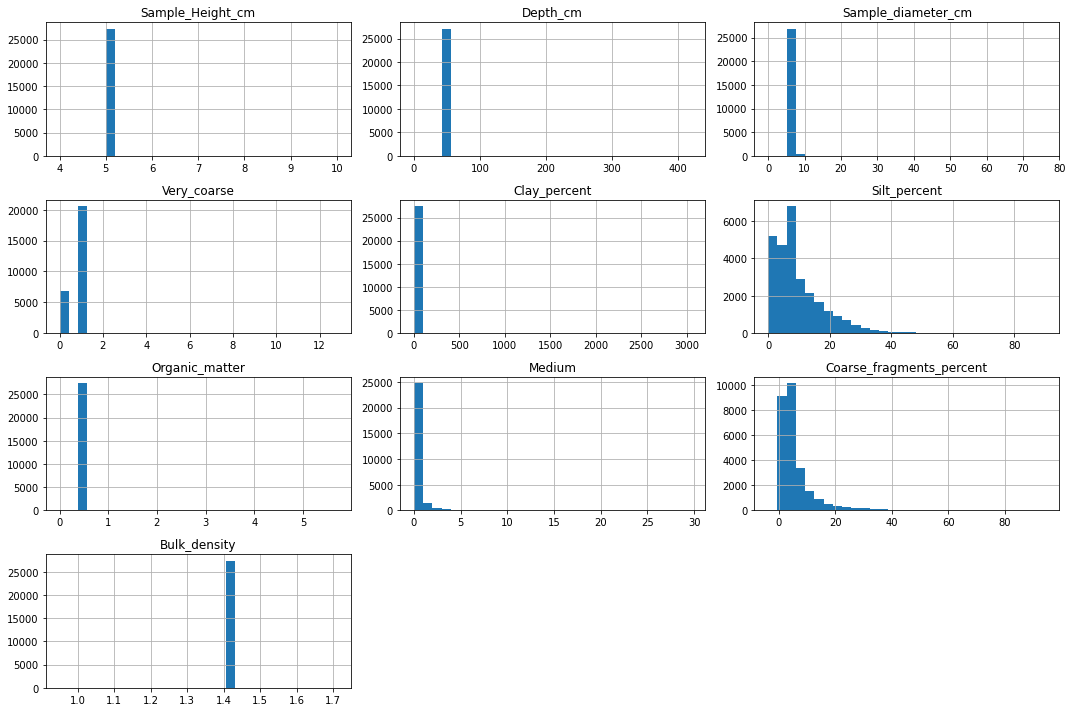


Highly skewed features (abs(skew) > 0.5):
Sample_Height_cm            22.450923
Depth_cm                    16.874319
Sample_diameter_cm          18.199072
Very_coarse                  2.675666
Clay_percent                50.619706
Silt_percent                 2.073559
Organic_matter              28.319557
Medium                       8.215031
Coarse_fragments_percent     4.287809
Bulk_density                -8.990356
dtype: float64


In [113]:
# Check skewness of features
skewness = data[top_features_corrected].skew()
print("\nSkewness of top features:")
print(skewness)

# Visualize skewness with histograms
plt.figure(figsize=(15, 10))
data[top_features_corrected].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Define threshold for high skewness
high_skew_threshold = 0.5
highly_skewed = skewness[abs(skewness) > high_skew_threshold]
print("\nHighly skewed features (abs(skew) > 0.5):")
print(highly_skewed)


In [114]:
# Feature Engineering

# Create interaction terms between top numerical features
interaction_terms = {}
for i in range(len(top_features_corrected)):
    for j in range(i+1, len(top_features_corrected)):
        feat1 = top_features_corrected[i]
        feat2 = top_features_corrected[j]
        col_name = f"{feat1}_{feat2}_interaction"
        interaction_terms[col_name] = data[feat1] * data[feat2]

# Add polynomial features for top features
poly_terms = {}
for feature in top_features_corrected:
    poly_terms[f"{feature}_squared"] = data[feature] ** 2
    poly_terms[f"{feature}_cubed"] = data[feature] ** 3

# Create log transformations for highly skewed features
log_terms = {}
for feature in top_features_corrected:
    if (data[feature] > 0).all():  # Only apply log to positive values
        log_terms[f"{feature}_log"] = np.log1p(data[feature])

# Combine all engineered features
engineered_features = pd.DataFrame({
    **interaction_terms,
    **poly_terms, 
    **log_terms
})

# Combine original and engineered features
X_engineered = pd.concat([data[top_features_corrected], engineered_features], axis=1)

print("Original feature count:", len(top_features_corrected))
print("Total features after engineering:", X_engineered.shape[1])

# Display sample of engineered features
print("\nSample of engineered features:")
print(X_engineered.head())


Original feature count: 10
Total features after engineering: 77

Sample of engineered features:
   Sample_Height_cm  Depth_cm  Sample_diameter_cm  Very_coarse  Clay_percent  \
0               4.0       0.0                 5.4          3.5          14.8   
1               4.0      50.0                 5.4          2.9          47.9   
2               4.0       0.0                 5.4          6.1          12.6   
3               4.0      50.0                 5.4          1.6          68.2   
4               4.0       0.0                 5.4          6.1          13.9   

   Silt_percent  Organic_matter  Medium  Coarse_fragments_percent  \
0          59.4             5.5     5.2                       4.1   
1          36.0             0.7     3.6                       4.1   
2          60.5             4.5     5.2                       4.1   
3          34.5             0.4     1.4                       4.1   
4          60.9             5.2     4.9                       4.1   

   Bulk_

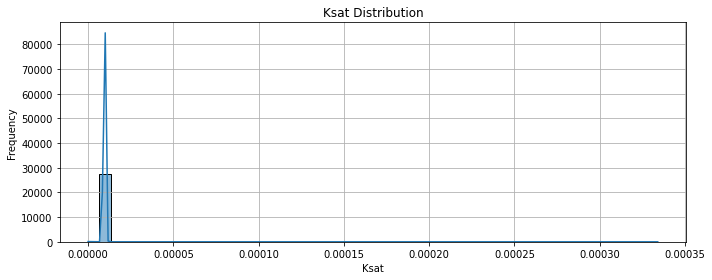

((27483, 6),
 count    2.748300e+04
 mean     9.742220e-06
 std      4.857517e-06
 min      7.430000e-09
 25%      9.580000e-06
 50%      9.580000e-06
 75%      9.580000e-06
 max      3.340000e-04
 Name: Ksat, dtype: float64)

In [115]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature set and target
feature_cols = [
    'Sample_Height_cm', 'Sample_diameter_cm', 'Bulk_density',
    'Depth_cm', 'Silt_percent', 'Clay_percent'
]
target_col = 'Ksat'

# Use original data since engineered features don't have the expected column names
X = data[feature_cols]
y = data[target_col]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check target distribution (imbalance)
plt.figure(figsize=(10, 4))
sns.histplot(y, bins=50, kde=True)
plt.title('Ksat Distribution')
plt.xlabel('Ksat')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Return standardized feature shape and basic stats of target
X_scaled.shape, y.describe()


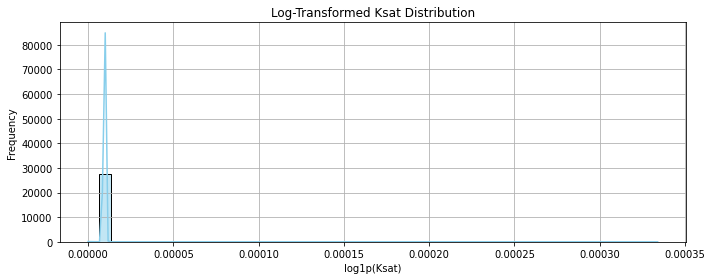

count    2.748300e+04
mean     9.742161e-06
std      4.857017e-06
min      7.430000e-09
25%      9.579954e-06
50%      9.579954e-06
75%      9.579954e-06
max      3.339442e-04
Name: Ksat, dtype: float64

In [116]:
# Apply log transformation to Ksat
y_log = np.log1p(y)

# Plot the transformed target
plt.figure(figsize=(10, 4))
sns.histplot(y_log, bins=50, kde=True, color="skyblue")
plt.title('Log-Transformed Ksat Distribution')
plt.xlabel('log1p(Ksat)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Show basic stats
y_log.describe()


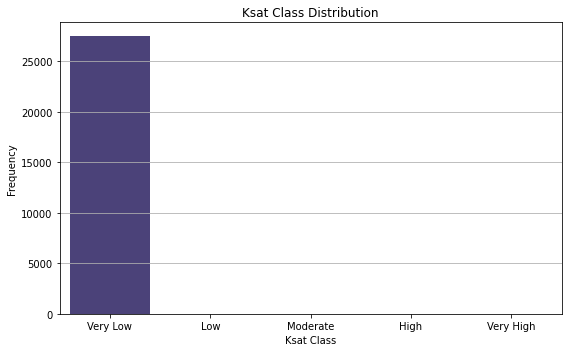

Ksat
Very Low     27483
Low              0
Moderate         0
High             0
Very High        0
Name: count, dtype: int64

In [117]:
# Create Ksat class bins (e.g., Very Low, Low, Moderate, High, Very High)
bins = [-np.inf, 0.001, 0.1, 1, 10, np.inf]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Apply binning to the original Ksat values
ksat_classes = pd.cut(y, bins=bins, labels=labels)

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=ksat_classes, order=labels, palette='viridis')
plt.title('Ksat Class Distribution')
plt.xlabel('Ksat Class')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Return distribution counts
ksat_classes.value_counts().sort_index()


In [118]:
y.describe()
y.value_counts(bins=10)


(-0.001000327, 3.34e-05]    27430
(3.34e-05, 6.68e-05]           20
(6.68e-05, 0.0001]             15
(0.0001, 0.000134]              7
(0.000134, 0.000167]            5
(0.0002, 0.000234]              3
(0.000301, 0.000334]            2
(0.000167, 0.0002]              1
(0.000234, 0.000267]            0
(0.000267, 0.000301]            0
Name: count, dtype: int64

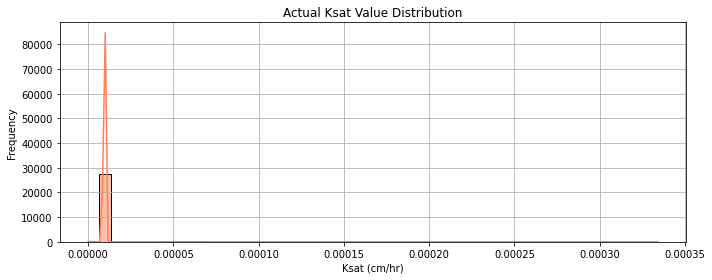

(count    2.748300e+04
 mean     9.742220e-06
 std      4.857517e-06
 min      7.430000e-09
 25%      9.580000e-06
 50%      9.580000e-06
 75%      9.580000e-06
 max      3.340000e-04
 Name: Ksat, dtype: float64,
 Ksat
 (-3.27e-07, 3.34e-05]    27430
 (3.34e-05, 6.68e-05]        20
 (6.68e-05, 0.0001]          15
 (0.0001, 0.000134]           7
 (0.000134, 0.000167]         5
 (0.000167, 0.0002]           1
 (0.0002, 0.000234]           3
 (0.000234, 0.000267]         0
 (0.000267, 0.000301]         0
 (0.000301, 0.000334]         2
 Name: count, dtype: int64)

In [119]:
# Recheck Ksat target variable before splitting or modeling
ksat_summary = y.describe()
ksat_bins = pd.cut(y, bins=10).value_counts().sort_index()

# Plot the actual distribution of Ksat (non-log)
plt.figure(figsize=(10, 4))
sns.histplot(y, bins=50, kde=True, color="coral")
plt.title('Actual Ksat Value Distribution')
plt.xlabel('Ksat (cm/hr)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

ksat_summary, ksat_bins


Baseline model

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_log_error, r2_score
import numpy as np

# Train-test split (80/20)
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X_scaled, y_log, test_size=0.2, random_state=42
)

# Baseline model (mean predictor)
baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(X_train, y_train_log)
y_pred_log_baseline = baseline_model.predict(X_test)

# Evaluate in log space
rmsle_baseline = np.sqrt(mean_squared_log_error(y_test_log, y_pred_log_baseline))
r2_baseline = r2_score(y_test_log, y_pred_log_baseline)

rmsle_baseline, r2_baseline


(5.62229595933649e-06, -0.0002492199653227889)

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

# Train a Random Forest model with default parameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_log)

# Predict on test data
y_pred_log_rf = rf_model.predict(X_test)

# Evaluate in log scale
rmsle_rf = np.sqrt(mean_squared_log_error(y_test_log, y_pred_log_rf))
r2_rf = r2_score(y_test_log, y_pred_log_rf)

rmsle_rf, r2_rf


(3.0912160589856848e-06, 0.6976088513545392)

In [123]:
# Clip negative predictions to zero
y_pred_log_mlp = np.maximum(y_pred_log_mlp, 0)

# Recalculate metrics
rmsle_mlp = np.sqrt(mean_squared_log_error(y_test_log, y_pred_log_mlp))
r2_mlp = r2_score(y_test_log, y_pred_log_mlp)

rmsle_mlp, r2_mlp



NameError: name 'y_pred_log_mlp' is not defined

#Baseline model (Before preprocessing)

Now lets create a baseline model (Linear regression before data preprocessing)